In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def load_data(subjects = "all", gestures = "all", dataset = "parsed"):
    """load data set from master (i.e. raw) or parsed set
    if subject number is specified [list type] load just that (those) subject(s)
    if gesture is specified [list type] load just that (those) gesture number(s)"""
    
    subj_lvl_dir = "./Data/EMG_data_for_gestures-" + dataset + "/"
    
    if subjects == "all":
        subjs = os.listdir(subj_lvl_dir)
    else:
        subjs = subjects
    
    if gestures == "all":
        # does not include 0 gesture; must specify
        gests = ["1", "2", "3", "4", "5", "6"]
    else:
        gests = gestures
    
    data_dict = {}
    # generate data sict subject : {gesture : array}
    for s in subjs:
        data_dict[s] = {}
        dir_root = subj_lvl_dir + s + "/"
        for f in os.listdir(dir_root):
            if f[0] in gests:
                with open(dir_root + f, "r") as fh:
                    data_dict[s][f[0:3]] = np.loadtxt(fh, delimiter = ",", skiprows = 1)
    
        
    
    return data_dict

In [3]:
tst = load_data(subjects=["05", "11", "30"], gestures=["2", "4", "6"])

In [4]:
tst.keys()

dict_keys(['05', '11', '30'])

In [5]:
# subject 05; gesture 2; 
tst["05"].keys()

dict_keys(['2_1', '2_0', '6_0', '4_1', '6_1', '4_0'])

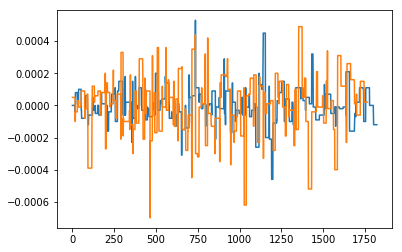

In [6]:
plt.plot(tst["05"]["2_0"][:, 0], tst["05"]["2_0"][:, 1], tst["05"]["2_0"][:, 4])
pass